In [56]:
# import libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# train/test/validation set split (55,000 | 10,000 | 5000)
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, X_valid, y_train, y_valid = X_train_full[:-5000], X_train_full[-5000:], y_train_full[:-5000], y_train_full[-5000:]

# normalize
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test /  255.

In [28]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

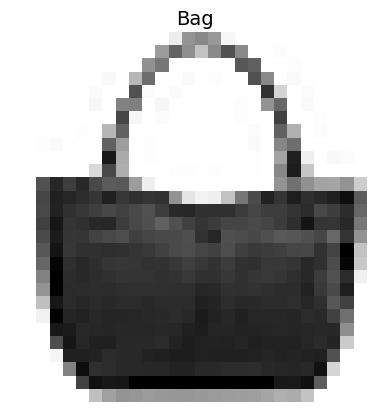

In [29]:
# a function to visualize an image
def show_image(img, label):
    plt.imshow(img, cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.title(label, fontsize=14)
    plt.show()

show_image(X_train[100], labels[y_train[100]])

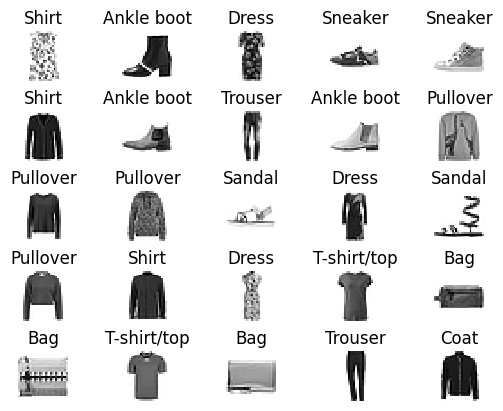

In [41]:
# visualize some data

n_rows = 5
n_cols = 5

for row in range(n_rows):
    for col in range(n_cols):
        index = row * n_cols + col
        plt.subplot(n_rows, n_cols, index + 1)
        random_index = np.random.randint(0, X_train.shape[0])
        plt.imshow(X_train[random_index], cmap="binary", interpolation="nearest")
        plt.title(labels[y_train[random_index]], fontsize=12)
        plt.axis("off")
        
plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show() 

In [52]:
# Define the model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="leaky_relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="leaky_relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [55]:
# train model
history_first = model.fit(X_train, y_train, epochs=20,
                          validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4975 - accuracy: 0.8220 - val_loss: 0.3983 - val_accuracy: 0.8434
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3782 - accuracy: 0.8624 - val_loss: 0.4064 - val_accuracy: 0.8496
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3414 - accuracy: 0.8743 - val_loss: 0.3821 - val_accuracy: 0.8646
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3214 - accuracy: 0.8803 - val_loss: 0.3452 - val_accuracy: 0.8728
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3059 - accuracy: 0.8866 - val_loss: 0.3464 - val_accuracy: 0.8750
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2888 - accuracy: 0.8927 - val_loss: 0.3386 - val_accuracy: 0.8784
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2808 - accuracy: 0.8959 - val_loss: 0.3353 - val_accuracy:

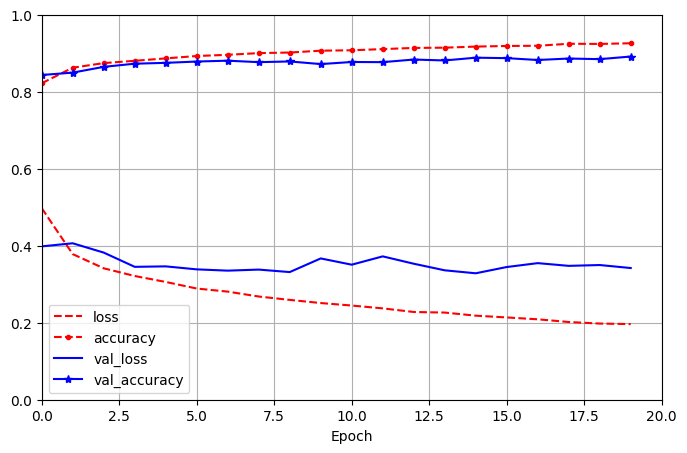

In [58]:
# plot training vs validation 
pd.DataFrame(history_first.history).plot(
    figsize=(8, 5), xlim=[0, 20], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])

plt.show()


In [62]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 845us/step - loss: 0.3499 - accuracy: 0.8856


In [69]:
def build_model():
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="leaky_relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="leaky_relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

def build_and_train_model(optimizer, callback, epochs):
    build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=epochs,
                     validation_data=(X_valid, y_valid),
                     callbacks=[callback])

In [70]:
EarlyStopping_cb = tf.keras.callbacks.EarlyStopping(patience=10)
history_early_stopping = build_and_train_model(optimizer, EarlyStopping_cb, epochs=30)

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1611 - accuracy: 0.9388 - val_loss: 0.3724 - val_accuracy: 0.8916
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1595 - accuracy: 0.9388 - val_loss: 0.3785 - val_accuracy: 0.8836
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1572 - accuracy: 0.9401 - val_loss: 0.3958 - val_accuracy: 0.8872
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1543 - accuracy: 0.9418 - val_loss: 0.3975 - val_accuracy: 0.8870
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1510 - accuracy: 0.9427 - val_loss: 0.4024 - val_accuracy: 0.8882
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1472 - accuracy: 0.9444 - val_loss: 0.3990 - val_accuracy: 0.8824
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1480 - accuracy: 0.9431 - val_loss: 0.4079 - val_accuracy:

In [72]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 873us/step - loss: 0.4239 - accuracy: 0.8866


In [77]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=2, max_value=5, default=2)
    n_neurons =  hp.Int("n_neurons", min_value=50, max_value=100)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value= 1e-2, sampling="log")
    optimizer = hp.Choice("Optimizer", values=["sgd", "nesterov", "adam", "adamw", "adamn"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "nesterov":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "adamw":
        optimizer = tf.keras.optimizers.AdamW(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.AdamN(learning_rate=learning_rate)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="leaky_relu",
                                        kernel_initializer="he_normal"))
    
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer, metrics=["accuracy"])
    
    return model

In [81]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=15, overwrite=True,
    directory="my_fashion_mnist", project_name="random_search", seed=42
)

random_search_tuner.search(X_train, y_train, epochs=20,
                           validation_data=(X_valid, y_valid),
                           callbacks=[EarlyStopping_cb])

Trial 15 Complete [00h 00m 43s]
val_accuracy: 0.8855999708175659

Best val_accuracy So Far: 0.8906000256538391
Total elapsed time: 00h 09m 39s


In [82]:
top3params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3params[0].values

{'n_hidden': 5,
 'n_neurons': 72,
 'learning_rate': 0.0005509513888645584,
 'Optimizer': 'adamw'}

In [84]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [85]:
best_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 847us/step - loss: 0.3368 - accuracy: 0.8885


[0.33684736490249634, 0.8884999752044678]